# Thông tin sinh viên


*   MSSV: 20522012
*   Họ và tên: Phạm Trần Anh Tiên
*   Bài tập 2
*   Ngày thực hiện: 8/3/2022

# Yêu cầu 1: Đọc ảnh và hiển thị ảnh kết quả sau khi dò tìm cạnh: Gx, Gy và G

## Khai báo các thư viện cần sử dụng

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
from scipy.spatial import distance

## Định nghĩa các hàm con

In [ ]:
def show_2_image(img1, img2, title1, title2):
    plt.figure(figsize=(20, 20))

    # Show img1
    plt.subplot(1, 2, 1)
    plt.title(title1)
    img1 = cv2.cvtColor(img1.astype(np.uint8), cv2.COLOR_BGR2RGB)
    plt.imshow(img1, interpolation='bicubic')

    # Show img1
    plt.subplot(1, 2, 2)
    plt.title(title2)
    img2 = cv2.cvtColor(img2.astype(np.uint8), cv2.COLOR_BGR2RGB)
    plt.imshow(img2, interpolation='bicubic')


def sobel_filters(img):
    Sx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Sy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)

    Ix = cv2.filter2D(img, -1, Sx)
    Iy = cv2.filter2D(img, -1, Sy)

    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)

    return Ix, Iy, G, theta

## Kết nối đến google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Đặt các đường dẫn cho bài tập

In [ ]:
import os
dir_monhoc = '/content/drive/MyDrive/CS231.M22.KHCL'
dir_baitap = os.path.join(dir_monhoc, 'Baitap', 'Baitap2')
dir_images = os.path.join(dir_baitap, 'images')

## Đọc và hiển trị ảnh

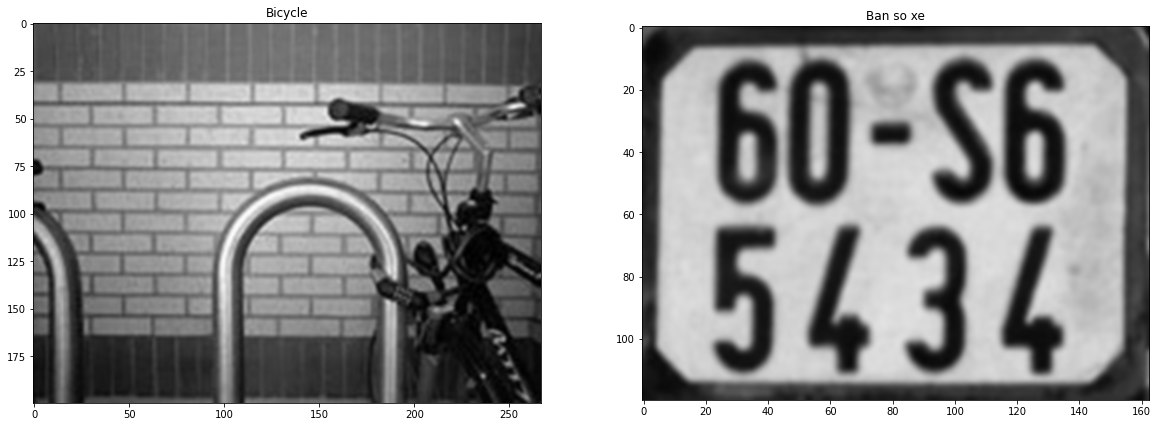

In [ ]:
# Đọc ảnh 
bicycle_dir = os.path.join(dir_images, 'Bicycle.jpg')
bansoxe_dir = os.path.join(dir_images, 'bansoxe.jpg')

bicycle_img = cv2.imread(bicycle_dir, 0)
bansoxe_img = cv2.imread(bansoxe_dir, 0)

# Hiển thị ảnh
show_2_image(bicycle_img, bansoxe_img, 'Bicycle', 'Ban so xe')

## Gx, Gy và G của ảnh Bicycle.jpg

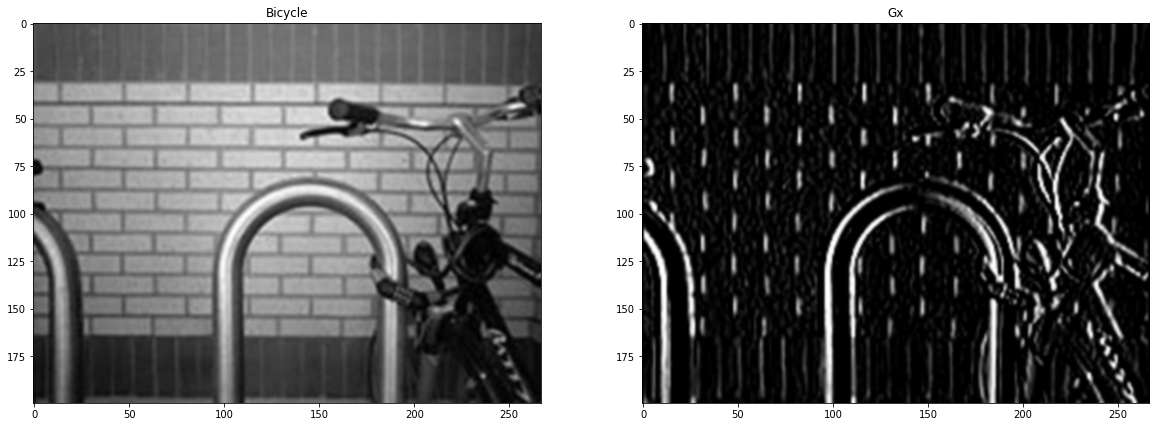

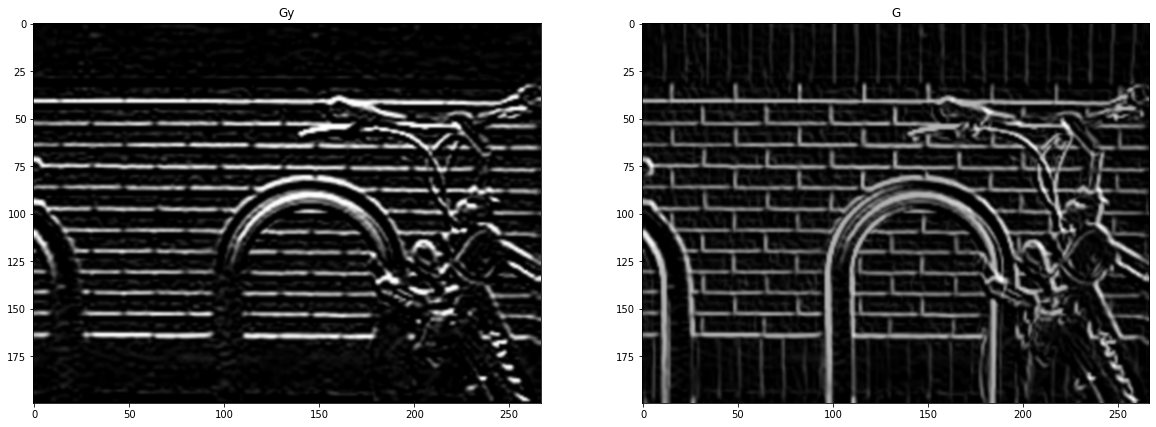

In [ ]:
Gx_bicycle, Gy_bicycle, G_bicycle, theta_bicycle = sobel_filters(bicycle_img)
show_2_image(bicycle_img, Gx_bicycle, 'Bicycle', 'Gx')
show_2_image(Gy_bicycle, G_bicycle, 'Gy', 'G')

## Gx, Gy và G của ảnh bansoxe.jpg

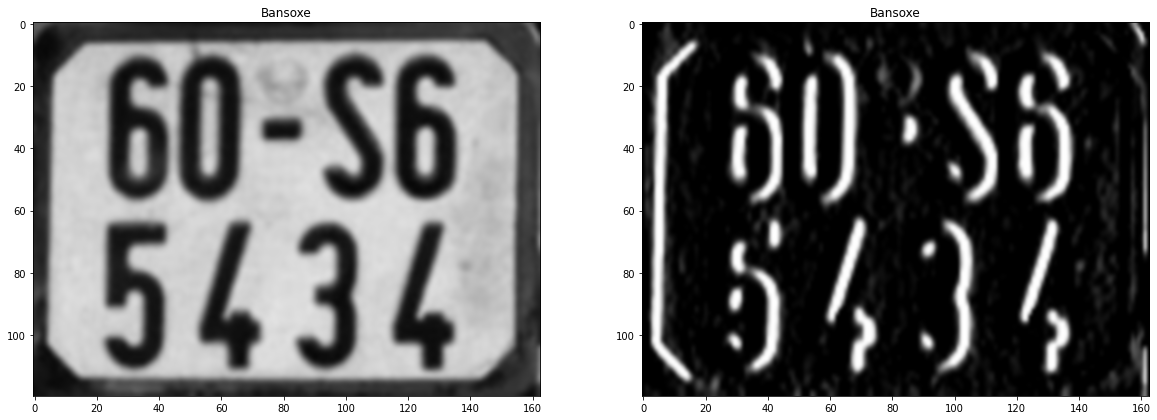

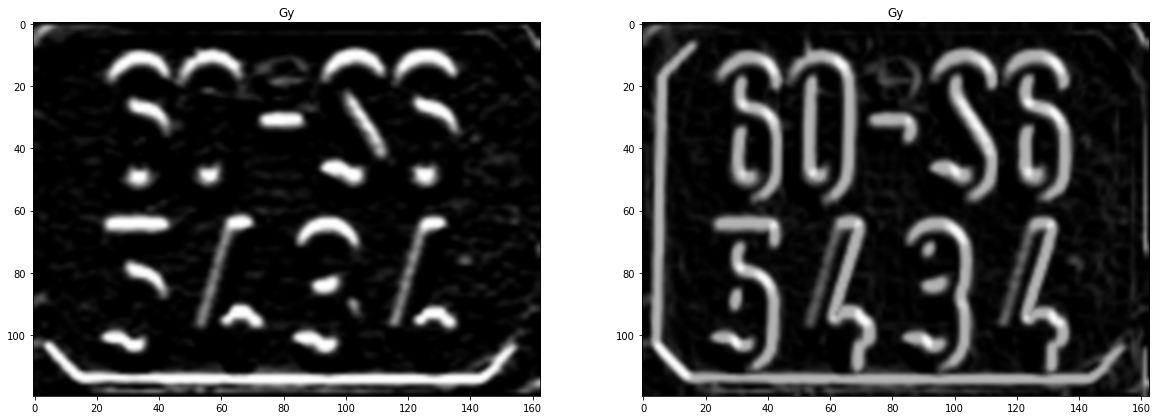

In [ ]:
Gx_bansoxe, Gy_bansoxe, G_bansoxe, theta_bansoxe = sobel_filters(bansoxe_img)
show_2_image(bansoxe_img, Gx_bansoxe, 'Bansoxe', 'Gx')
show_2_image(Gy_bansoxe, G_bansoxe, 'Gy', 'G')

# Yêu cầu 2

## Viết hàm xác định đặc trưng ảnh dựa trên thông tin cạnh: theo trục x và trục y

In [ ]:
def calFeatureVector(img):
    img_ = cv2.resize(img, (256, 256))
    _, _, G, _ = sobel_filters(img_)
    row_sum = np.sum(G, axis=1, dtype=np.float64)
    col_sum = np.sum(G, axis=0, dtype=np.float64)
    return (np.hstack((row_sum.T, col_sum)))

# def calFeartureVector(img_src):
#     img_dst = img_src.copy()
#     img_dst = cv2.resize(img_dst, (256, 256))
#     Ix, Iy, G, theta = sobel_filters(img_dst)
#     fearture = []
#     for i in range(G.shape[0]):
#         tmp = 0
#         for j in range(G.shape[1]):
#             tmp = tmp + G[i,j]
#             fearture.append(tmp)

#     for j in range(G.shape[1]):
#         tmp = 0
#         for i in range(G.shape[0]):
#             tmp = tmp + G[i,j]
#             fearture.append(tmp)
#     return fearture

## Đọc ảnh và xác định đặc trưng ảnh theo thông tin cạnh

In [ ]:
# Đọc 3 ảnh image_0814.jpg, image_0816.jpg, image_1248.jpg
dir_0814 = os.path.join(dir_images, 'image_0814.jpg')
dir_0816 = os.path.join(dir_images, 'image_0816.jpg')
dir_1248 = os.path.join(dir_images, 'image_1248.jpg')


img_0814 = cv2.imread(dir_0814, 0)
img_0816 = cv2.imread(dir_0816, 0)
img_1248 = cv2.imread(dir_1248, 0)


# Tính toán đặc trưng 3 ảnh dựa theo thông tin cạnh
vector_0814 = calFeatureVector(img_0814)
vector_0816 = calFeatureVector(img_0816)
vector_1248 = calFeatureVector(img_1248)

## Tính khoảng cách euclidean giữa 2 ảnh: sử dụng thư viện của scipy

In [ ]:
# Tính khoảng cách euclidean giữa 2 ảnh
euclidean1 = distance.euclidean(vector_0814, vector_0816)
euclidean2 = distance.euclidean(vector_0814, vector_1248)

print('Khoang cach giua hai anh 0814 va 0816: ', euclidean1)
print('Khoang cach giua hai anh 0814 va 1248: ', euclidean2)

Khoang cach giua hai anh 0814 va 0816:  55432.88078311733
Khoang cach giua hai anh 0814 va 1248:  92123.37554385341


## Tính sự tương đồng theo cosin giữa 2 ảnh.

In [ ]:
# Tính độ tương đồng giữa 2 ảnh
cosine1 = 1 - distance.cosine(vector_0814, vector_0816)
cosine2 = 1 - distance.cosine(vector_0814, vector_1248)

print('Do tuong dong giua hai anh 0814 va 0816: ', cosine1)
print('Do tuong dong giua hai anh 0814 va 1248: ', cosine2)

Do tuong dong giua hai anh 0814 va 0816:  0.9403013260778476
Do tuong dong giua hai anh 0814 va 1248:  0.8133452847890963
